<a href="https://colab.research.google.com/github/jammy-bot/va-covid-plotly/blob/master/va_covid_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Virginia COVID-19 Cases

__Clone the Existing Repository (into Google Colaboratory)__

In [1]:
!git clone https://github.com/jammy-bot/va-covid-plotly.git

Cloning into 'va-covid-plotly'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 20), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.


__Import Required Libraries__

In [2]:
# importing os for directory / path operations
import os
os.getcwd()

'/content'

In [3]:
# move to the repo path
os.chdir('/content/va-covid-plotly/')
os.getcwd()

'/content/va-covid-plotly'

In [4]:
# importing for dataframe and plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# importing plotly express for plot animation
try:
    import plotly.express as px
except:
    !pip install plotly
    import plotly.express as px

## Obtain Data

Data sourced from [Virginia Department of Health](https://www.vdh.virginia.gov/coronavirus/) (VDH)--last updated July 30, 2020.

Each row represents the overall count of COVID-19 cases, hospitalizations, deaths for each locality in Virginia by report date since reporting began for this dataset.

Column Name |	Description	| Type
--- | --- | ---
Report Date |	Date when the case, hospitalization, or death is published |	Date & Tim
FIPS |	5-digit code (51XXX) for the locality |	Plain Text
Locality |	Independent city or county in Virginia |	Plain Text
VDH Health District |	Health district name assigned by the Virginia Department of Health. There are 35 health districts in Virginia. |	Plain Text
Total Cases |	Total number of COVID-19 cases |	Number
Hospitalizations |	Total number of COVID-19 hospitalizations |	Number
Deaths |	Total number of COVID-19 deaths |	Number


In [6]:
# reading VDH data from csv file
data_df = pd.read_csv("/content/va-covid-plotly/data/VDH-COVID-19-PublicUseDataset-Cases.csv", 
                      dtype={"fips": str})

# viewing dataframe shape and first / last rows
print(data_df.shape, "\n")
display(data_df.head())

(18088, 7) 



,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths
0,03/17/2020,51001,Accomack,Eastern Shore,0,0,0
1,03/17/2020,51003,Albemarle,Thomas Jefferson,0,0,0
2,03/17/2020,51005,Alleghany,Alleghany,0,0,0
3,03/17/2020,51007,Amelia,Piedmont,0,0,0
4,03/17/2020,51009,Amherst,Central Virginia,0,0,0


# Scrub Data

__View dataset info__

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18088 entries, 0 to 18087
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Report Date          18088 non-null  object
 1   FIPS                 18088 non-null  int64 
 2   Locality             18088 non-null  object
 3   VDH Health District  18088 non-null  object
 4   Total Cases          18088 non-null  int64 
 5   Hospitalizations     18088 non-null  int64 
 6   Deaths               18088 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 989.3+ KB


There are no rows missing data.

We will make a copy of the dataframe, for data preparation.

In [8]:
# instantiating a copy of the dataframe as cities_df
cities_df = data_df.copy()

# viewing first rows of dataframe
cities_df.head()

,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths
0,03/17/2020,51001,Accomack,Eastern Shore,0,0,0
1,03/17/2020,51003,Albemarle,Thomas Jefferson,0,0,0
2,03/17/2020,51005,Alleghany,Alleghany,0,0,0
3,03/17/2020,51007,Amelia,Piedmont,0,0,0
4,03/17/2020,51009,Amherst,Central Virginia,0,0,0


In [9]:
# converting column name spaces to "_" and converting to lower case
cities_df.columns = [x.lower().replace(" ", "_") for x in cities_df.columns]

# convert the `locality` column to string type
cities_df["locality"] = cities_df["locality"].astype(str)

# dropping the health district column
cities_df.drop(["vdh_health_district"], axis=1, inplace=True)

# viewing info after adjustments
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18088 entries, 0 to 18087
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   report_date       18088 non-null  object
 1   fips              18088 non-null  int64 
 2   locality          18088 non-null  object
 3   total_cases       18088 non-null  int64 
 4   hospitalizations  18088 non-null  int64 
 5   deaths            18088 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 848.0+ KB


# =================================

# Explore Data

Let's first see how many unique localities (independent cities and counties) are there, in Virginia.

In [10]:
cities_df.locality.nunique()

133

We know from our data dictionary that the `fips` code is unique to a locality, so the two columns should have the same number of unique values.

In [11]:
cities_df.fips.nunique()

133

__Group and Sort by Top Values for Each of Cases, Hospitalizations, and Deaths__

We have observed that the dataframe is grouped by `report_date` and ordered by `locality`. Let's group by locality and plot top values for the numerical features (`total_cases`, `hospitalizations`, and `deaths`).

__Cases__

In [12]:
# sorting highest - to - lowest by cases
cases_df = pd.DataFrame(cities_df.groupby('locality')[['total_cases']].sum().
                        sort_values(by='total_cases', ascending=False))

# adding an index
cases_df.reset_index(inplace=True)

# viewing the grouped / sorted cases dataframe shape and head
display(cases_df.shape, cases_df.head(10))

(133, 2)

,locality,total_cases
0,Fairfax,1106116
1,Prince William,569103
2,Loudoun,295934
3,Arlington,213985
4,Henrico,211272
5,Chesterfield,207035
6,Alexandria,194493
7,Richmond City,159178
8,Virginia Beach,122864
9,Manassas City,104981


Our highest value for total cases in a locality is above 1.1 million.

_Plot Cases_

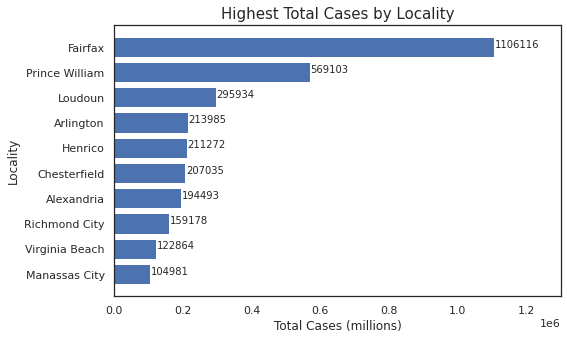

In [13]:
# defining the plot
plt.figure(figsize=(8,5))
case_plot = plt.barh(y = cases_df.head(10)['locality'], 
         width=cases_df.head(10).total_cases)

# adding labels, title, and limits
plt.xlabel('Total Cases (millions)')
plt.ylabel('Locality')
plt.title("Highest Total Cases by Locality", fontsize=15)
plt.ylim(plt.ylim()[::-1]) # display with highest value on top
plt.xlim(right=1300000) # expand right border

# add values to end of bars
for index, value in enumerate(cases_df.head(10).total_cases):
    plt.text(value + 2000, index, str(value), fontsize=10)

# displaying plot
plt.show()

We see the highest number of total cases for the period in Fairfax--almost double that of the next highest locality.

__Hospitalizations__

In [14]:
# by hospitalizations
hospitalizations_df = cities_df.groupby(
    'locality')['hospitalizations'].sum().sort_values(ascending=False)
hospitalizations_df.head(10)

# sorting highest - to - lowest by hospitalizations
hospitalizations_df = pd.DataFrame(cities_df.groupby('locality')[['hospitalizations']].sum().
                        sort_values(by='hospitalizations', ascending=False))

# adding an auto - incrementing index
hospitalizations_df.reset_index(inplace=True)

# viewing highest value for hospitalizations
hospitalizations_df.head(1)

,locality,hospitalizations
0,Fairfax,138320


Fairfax also accounts for the highest number of COVID-19 hospitalizations, in the examined time period.


_Plot Hospitalizations_

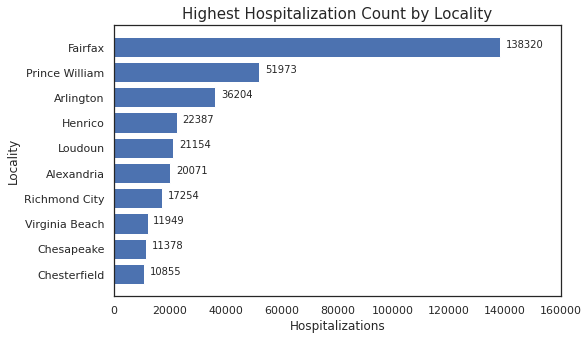

In [15]:
# defining the plot
plt.figure(figsize=(8,5))
barplot = plt.barh(y = hospitalizations_df.head(10)['locality'], 
         width=hospitalizations_df.head(10).hospitalizations)

# adding labels, title, and limits
plt.xlabel('Hospitalizations')
plt.ylabel('Locality')
plt.title("Highest Hospitalization Count by Locality", fontsize=15)
plt.ylim(plt.ylim()[::-1]) # display with highest value on top
plt.xlim(right=160000) # expand right border beyone the highest value

# add values to end of bars
for index, value in enumerate(hospitalizations_df.head(10).hospitalizations):
    plt.text(value + 2000, index, str(value), fontsize=10)

# displaying plot
plt.show()

The same localities in the top 5 for total cases are also in the top 5 for hospitalization. Fairfax reports more than 2.6 - times the hospitalizations of the next - highest reported locality, Prince William.

__Deaths__

In [16]:
# by deaths
deaths_df = cities_df.groupby('locality')['deaths'].sum().sort_values(ascending=False)
deaths_df.head(10)

# by hospitalizations
deaths_df = cities_df.groupby('locality')['deaths'].sum().sort_values(ascending=False)
deaths_df.head(10)

# sorting highest - to - lowest by deaths
deaths_df = pd.DataFrame(cities_df.groupby('locality')[['deaths']].sum().
                        sort_values(by='deaths', ascending=False))

# adding an auto - incrementing index
deaths_df.reset_index(inplace=True)

# viewing highest value for deaths
deaths_df.head(1)

,locality,deaths
0,Fairfax,37990


The greatest number of related deaths are also reported from Fairfax.

_Plot Deaths_

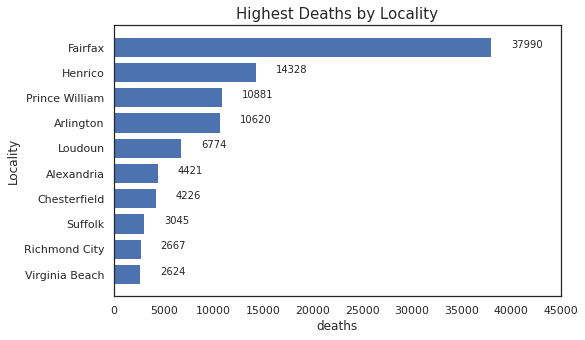

In [17]:
# defining the plot
plt.figure(figsize=(8,5))
barplot = plt.barh(y = deaths_df.head(10)['locality'], 
         width=deaths_df.head(10).deaths)

# adding labels, title, and limits
plt.xlabel('deaths')
plt.ylabel('Locality')
plt.title("Highest Deaths by Locality", fontsize=15)
plt.ylim(plt.ylim()[::-1]) # display with highest value on top
plt.xlim(right=45000) # expand right border beyone the highest value

# add values to end of bars
for index, value in enumerate(deaths_df.head(10).deaths):
    plt.text(value + 2000, index, str(value), fontsize=10)

# displaying plot
plt.show()

Fairfax records greater than 2.6 - times the number of deaths recorded for Henrico, the next highest reporting locality for this category.

__Limit the localities of interest.__

Virginia's Hampton Roads region experienced outbreaks in late July. We will plot them alongside the state's capital of Richmond (City) and compare cases, hospitalizations, and deaths over time.

In [18]:
# list the localities
print(sorted(set(x for x in cities_df.locality)))

['Accomack', 'Albemarle', 'Alexandria', 'Alleghany', 'Amelia', 'Amherst', 'Appomattox', 'Arlington', 'Augusta', 'Bath', 'Bedford', 'Bland', 'Botetourt', 'Bristol', 'Brunswick', 'Buchanan', 'Buckingham', 'Buena Vista City', 'Campbell', 'Caroline', 'Carroll', 'Charles City', 'Charlotte', 'Charlottesville', 'Chesapeake', 'Chesterfield', 'Clarke', 'Colonial Heights', 'Covington', 'Craig', 'Culpeper', 'Cumberland', 'Danville', 'Dickenson', 'Dinwiddie', 'Emporia', 'Essex', 'Fairfax', 'Fairfax City', 'Falls Church', 'Fauquier', 'Floyd', 'Fluvanna', 'Franklin City', 'Franklin County', 'Frederick', 'Fredericksburg', 'Galax', 'Giles', 'Gloucester', 'Goochland', 'Grayson', 'Greene', 'Greensville', 'Halifax', 'Hampton', 'Hanover', 'Harrisonburg', 'Henrico', 'Henry', 'Highland', 'Hopewell', 'Isle of Wight', 'James City', 'King George', 'King William', 'King and Queen', 'Lancaster', 'Lee', 'Lexington', 'Loudoun', 'Louisa', 'Lunenburg', 'Lynchburg', 'Madison', 'Manassas City', 'Manassas Park', 'Marti

In [19]:
# listing select localiies for visual EDA
select_localities = ['Chesapeake', 'Norfolk', 'Richmond City', 'Virginia Beach']

# filtering `cities_df` for the selected localities
selected = cities_df.locality.isin(select_localities)

# instantiating a new dataframe with filtered localities, only
select_df = cities_df[selected]

# viewing the number of records
print(select_df.shape)

# viewing the last 5 records in the dataset
select_df.tail()

(544, 6)


,report_date,fips,locality,total_cases,hospitalizations,deaths
17950,07/29/2020,51760,Richmond City,2831,270,39
18054,07/30/2020,51550,Chesapeake,2391,199,27
18073,07/30/2020,51710,Norfolk,3080,165,22
18079,07/30/2020,51760,Richmond City,2857,273,38
18084,07/30/2020,51810,Virginia Beach,3979,193,43


## Bar Plot, Total Cases by Locality

In [20]:
# viewing an animated bar plot
fig = px.bar(select_df,  
             x ="locality",  
             y ="total_cases", 
             color ='deaths', 
             animation_frame ='report_date', 
             hover_name ='locality',  
             range_y =[0, 4250]) 
fig.show()

Richmond cases appear most likely to have resulted in death, through mid - July. It was then surpassed by Virginia Beach in both the number of deaths and in the total number of cases.

## Bar Plot, Deaths by Locality

In [21]:
fig = px.bar(select_df,  
             x ="locality",  
             y ="deaths", 
             color ='hospitalizations', 
             animation_frame ='report_date', 
             hover_name ='locality',  
             range_y =[0, 50]) 
fig.show()

The plot suggests that COVID cases were less - likely to receive hospital treatment, in Norfolk, compared to Richmond. As the rate of death seems to slow toward the end of July, for Richmond, it appears to pick up pace in Virginia Beach. Meanwhile, the number of Virginia Beach hospitalizations is well below that of Richmond.

## Scatter Plot: May - July, 2020 Totals, Deaths vs Cases by Locality

In [22]:
# animating a scatter plot, with deaths determining data - point size 
fig = px.scatter( 
    select_df[select_df.report_date > "04/30/2020"],  
    x ="deaths",  
    y ="total_cases",  
    animation_frame ="report_date",  
    animation_group ="locality", 
    size ="deaths",  
    color ="locality",  
    hover_name ="locality",  
    facet_col ="locality", 
    size_max = 80, 
    range_x =[-50, 200], 
    range_y =[-10, 5000] 
) 
fig.show()

## Scatter Plot: May - July, 2020 Totals, Deaths vs Hospitalizations by Locality

In [23]:
# using data - point size to reflect `total_cases`
fig = px.scatter( 
    select_df[select_df.report_date > "04/30/2020"],  
    x ="deaths",  
    y ="hospitalizations",  
    animation_frame ="report_date",  
    animation_group ="locality", 
    size ="total_cases",  
    color ="locality",  
    hover_name ="locality",  
    facet_col ="locality", 
    size_max = 100, 
    range_x =[-10, 75], 
    range_y =[-10, 325] 
) 
fig.show()

Scatter point size is not particularly informative, in this layout. By the completion of the animation, point sizes for each locality do not appear significantly different, despite the range in total cases they represent.

## Scatter Plot: May - July, 2020 Totals, Hospitalizations vs Cases by Locality

In [24]:
# 
fig = px.scatter( 
    select_df[select_df.report_date > "04/30/2020"],  
    x ="hospitalizations",  
    y ="total_cases",  
    animation_frame ="report_date",  
    animation_group ="locality", 
    size ="total_cases",  
    color ="locality",  
    hover_name ="locality",  
    facet_col ="locality", 
    size_max = 50, 
    range_x =[0, 300], 
    range_y =[-10, 4500] 
) 
fig.show()

In each of the preceding plots, we see cases growing more rapidly in Richmond at the start of our timeline, with Virginia Beach later overtaking the capital in daily deaths and total cases. While Virginia Beach led in the number of hospitalizatons, at the beginning of our timeline, it was far surpased by Richmond from the second week of May through July.

## Feature Engineering

Let's bring in some population data.

This dataset is obtained from University of Virginia's [Weldon Cooper Center for Public Service Demographics Research Group](https://demographics.coopercenter.org/virginia-population-estimates), and was published  on January 27, 2020.

Column Name |	Description	| Type
--- | --- | ---
FIPS Code |	3-digit code (XXX) for the locality |	 |	
Locality | Independent city or county in Virginia
April 1, 2010 Census| Official population, count from the 2010 Census
July 1, 2019 Estimate | Population approximation "based on a variety of observed administrative record data, such as births, deaths, school enrollment, and residential housing construction"

In [25]:
# importing numpy
import numpy as np

In [70]:
pop_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/VAPopulationEstimates_2019-07_UVACooperCenter.xlsx - 2019 Table.csv', 
                     skiprows=4)
pop_df

,FIPS Code,Locality,"April 1, 2010 Census","July 1, 2019 Estimate",Numeric Change,Percent Change
0,NaN,Virginia,"8,001,024","8,535,519","534,495",6.7%
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Accomack County,"33,164","32,561",-603,-1.8%
3,3.0,Albemarle County,"99,010","109,722","10,712",10.8%
4,5.0,Alleghany County,"16,250","14,952","-1,298",-8.0%
...,...,...,...,...,...,...
179,NaN,18 Middle Peninsula,"90,826","91,247",421,0.5%
180,NaN,19 Crater,"496,955","530,142","33,187",6.7%
181,NaN,22 Accomack-Northampton,"45,553","44,371","-1,182",-2.6%
182,NaN,23 Hampton Roads,"1,666,310","1,729,109","62,799",3.8%


We will reduce the dataset to eliminate unneeded columns and rows.

Since we know there should be 133 Federal Information Processing Standard (FIPS) codes, we will check a few rows beyond that.

In [71]:
# printing to verify planned operation
print(pop_df.iloc[2:136,:4])

     FIPS Code             Locality April 1, 2010 Census July 1, 2019 Estimate
2          1.0      Accomack County               33,164                32,561
3          3.0     Albemarle County               99,010               109,722
4          5.0     Alleghany County               16,250                14,952
5          7.0        Amelia County               12,690                13,053
6          9.0       Amherst County               32,353                31,766
..         ...                  ...                  ...                   ...
131      810.0  Virginia Beach City              437,994               452,643
132      820.0      Waynesboro City               21,006                22,183
133      830.0    Williamsburg City               14,067                15,383
134      840.0      Winchester City               26,203                28,180
135        NaN       Total Counties            5,548,355             5,960,959

[134 rows x 4 columns]


Row 135 is a summary row.

* We will remove the unneeded columns and summary row.
* We will also drop the `2010_census` column and use the `2019_estimate` column for our population data.
* `FIPS Code` will be converted to an integer.

In [72]:
# removing rows
pop_df = pop_df.iloc[2:135,:4].drop(['April 1, 2010 Census'], axis=1)

# converting type
pop_df['FIPS Code'] = pop_df['FIPS Code'].astype(int)
pop_df

,FIPS Code,Locality,"July 1, 2019 Estimate"
2,1,Accomack County,"32,561"
3,3,Albemarle County,"109,722"
4,5,Alleghany County,"14,952"
5,7,Amelia County,"13,053"
6,9,Amherst County,"31,766"
...,...,...,...
130,800,Suffolk City,"93,825"
131,810,Virginia Beach City,"452,643"
132,820,Waynesboro City,"22,183"
133,830,Williamsburg City,"15,383"


Now, we will rename our column labels.

In [73]:
# renaming columns, replacing spaces with underscores and converting to lowercase
pop_df.rename(columns = {'FIPS Code':'fips_code', 
                         'Locality':'locality', 
                         'July 1, 2019 Estimate: 3':'2019_estimate'}, 
              inplace = True)

Let's add the Virginia prefix (51) to `fips_code`, to match our `fips` column in  `cities_df`. First, we need to prepend zeros to codes with fewer than 3 digits.

In [74]:
# padding `fips_code` with zeros to fill to length 3
pop_df['fips_code']=pop_df['fips_code'].apply(lambda x: '{0:0>3}'.format(x))

print(pop_df['fips_code'].head())

2    001
3    003
4    005
5    007
6    009
Name: fips_code, dtype: object


Note: padding the values with leading zeros converts the data type to objece / string.

In [75]:
# preceding all `fips_code` values with VA state FIPS code "51"
pop_df['fips_code'] = pop_df['fips_code'].apply(lambda x: '51' + x)

# viewing first and last rows
pop_df

,fips_code,locality,"July 1, 2019 Estimate"
2,51001,Accomack County,"32,561"
3,51003,Albemarle County,"109,722"
4,51005,Alleghany County,"14,952"
5,51007,Amelia County,"13,053"
6,51009,Amherst County,"31,766"
...,...,...,...
130,51800,Suffolk City,"93,825"
131,51810,Virginia Beach City,"452,643"
132,51820,Waynesboro City,"22,183"
133,51830,Williamsburg City,"15,383"




*   Convert the `fips_code` data type back to int.
*   Remove commas and convert the `July 1, 2019 Estimate` data type to int.



In [76]:
# checking dtypes pre - conversion
print("Original dtypes\n\n", pop_df.dtypes, "\n\n", "="*60)

# correcting dtype
pop_df.fips_code = pop_df.fips_code.astype(int)

# removing commas and correcting dtype
pop_df["July 1, 2019 Estimate"] = pop_df["July 1, 2019 Estimate"].str.replace(
    ",", ""
    ).astype(int)

# checking dtypes post - conversion
print("Converted dtypes\n\n", pop_df.dtypes, "\n\n")

# viewing first rows
pop_df.head()

Original dtypes

 fips_code                object
locality                 object
July 1, 2019 Estimate    object
dtype: object 

Converted dtypes

 fips_code                 int64
locality                 object
July 1, 2019 Estimate     int64
dtype: object 




,fips_code,locality,"July 1, 2019 Estimate"
2,51001,Accomack County,32561
3,51003,Albemarle County,109722
4,51005,Alleghany County,14952
5,51007,Amelia County,13053
6,51009,Amherst County,31766


We can use our `fips_code` to merge population data with our `cities_df` data (matching on its `FIPS` column), to analyze our cases, hospitalizations, and deaths against population estimates. We will only need the code and estimate colums, though.

In [77]:
# copying `pop_df`, dropping the locality column
pop_estimate_df = pop_df.copy().drop(['locality'], axis=1)

# viewing the new dataframe's first 5 rows
pop_estimate_df.head()

,fips_code,"July 1, 2019 Estimate"
2,51001,32561
3,51003,109722
4,51005,14952
5,51007,13053
6,51009,31766


Let's clean up the column label.

In [78]:
# updating column labels
pop_estimate_df.columns = ['fips_code', '2019_estimate']

# verifying updated labels
pop_estimate_df.columns

Index(['fips_code', '2019_estimate'], dtype='object')

Let's see what is our population range of values.

In [102]:
# sort `2019_estimate` to view its range of values
pop_estimate_df["2019_estimate"].sort_values()

46        2246
121       3879
10        4318
24        5108
105       5589
        ...   
22      350760
54      413546
131     452643
74      465498
30     1143528
Name: 2019_estimate, Length: 133, dtype: int64

The range of values suggests that we can engineer meaningful features per 1000 of population for each locality.

In [100]:
combined_df[combined_df["2019_estimate"] < 3000]["locality"].unique()

array(['Highland'], dtype=object)

### Merge Dataframes

We will combine our `cities_df` COVID-19 data with our `pop_estimate_df` population data.

In [123]:
# merging on `FIPS` and `fips_code` columns
combined_df = cities_df.merge(pop_estimate_df, 
                              left_on='fips', 
                              right_on='fips_code', 
                              how='left')

View the first few rows of the combined dataframe.

In [124]:
# view the first 5 entries where the FIPS`code is 51001
combined_df[combined_df['fips']==51001].head()

,report_date,fips,locality,total_cases,hospitalizations,deaths,fips_code,2019_estimate
0,03/17/2020,51001,Accomack,0,0,0,51001,32561
133,03/18/2020,51001,Accomack,0,0,0,51001,32561
266,03/19/2020,51001,Accomack,0,0,0,51001,32561
399,03/20/2020,51001,Accomack,1,0,0,51001,32561
532,03/21/2020,51001,Accomack,1,0,0,51001,32561


In [125]:
# verifying data types
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18088 entries, 0 to 18087
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   report_date       18088 non-null  object
 1   fips              18088 non-null  int64 
 2   locality          18088 non-null  object
 3   total_cases       18088 non-null  int64 
 4   hospitalizations  18088 non-null  int64 
 5   deaths            18088 non-null  int64 
 6   fips_code         18088 non-null  int64 
 7   2019_estimate     18088 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ MB


Drop the duplicate `fips_code` column.

In [126]:
# dropping `fips_code`
combined_df.drop("fips_code", axis=1, inplace=True)

# viewing the first two rows
combined_df[combined_df['fips']==51001].head(2)

,report_date,fips,locality,total_cases,hospitalizations,deaths,2019_estimate
0,03/17/2020,51001,Accomack,0,0,0,32561
133,03/18/2020,51001,Accomack,0,0,0,32561


### Feature Engineering--per 1K

In [132]:
# creating columns for statistical features per 1,000 of population
combined_df['cases_per_1k'] = round((combined_df["total_cases"]) / (
    combined_df["2019_estimate"]) * 1000, 3)
combined_df['hosps_per_1k'] = round((combined_df["hospitalizations"]) / (
    combined_df["2019_estimate"]) * 1000, 3)
combined_df['deaths_per_1k'] = round((combined_df["deaths"]) / (
    combined_df["2019_estimate"]) * 1000, 3)

In [133]:
# viewing arbitrary rows
combined_df.iloc[4750:4770, :]

,report_date,fips,locality,total_cases,hospitalizations,deaths,2019_estimate,cases_per_1k,hosps_per_1k,deaths_per_1k
4750,04/21/2020,51510,Alexandria,462,60,9,159152,2.903,0.377,0.057
4751,04/21/2020,51520,Bristol,1,0,0,17018,0.059,0.000,0.000
4752,04/21/2020,51530,Buena Vista City,5,0,0,6454,0.775,0.000,0.000
4753,04/21/2020,51540,Charlottesville,41,11,2,49181,0.834,0.224,0.041
4754,04/21/2020,51550,Chesapeake,176,39,5,245745,0.716,0.159,0.020
4755,04/21/2020,51570,Colonial Heights,36,0,2,17194,2.094,0.000,0.116
4756,04/21/2020,51580,Covington,1,0,0,5694,0.176,0.000,0.000
4757,04/21/2020,51590,Danville,29,13,1,39932,0.726,0.326,0.025
4758,04/21/2020,51595,Emporia,12,3,1,5589,2.147,0.537,0.179
4759,04/21/2020,51600,Fairfax City,22,2,1,23943,0.919,0.084,0.042


In [134]:
# viewing the row with max cases per 1000
combined_df[combined_df["cases_per_1k"] == combined_df["cases_per_1k"].max()]

,report_date,fips,locality,total_cases,hospitalizations,deaths,2019_estimate,cases_per_1k,hosps_per_1k,deaths_per_1k
18063,07/30/2020,51640,Galax,329,37,17,6545,50.267,5.653,2.597


In [135]:
# viewing the row with max hospitalizations per 1000
combined_df[combined_df["hosps_per_1k"] == combined_df["hosps_per_1k"].max()]

,report_date,fips,locality,total_cases,hospitalizations,deaths,2019_estimate,cases_per_1k,hosps_per_1k,deaths_per_1k
18063,07/30/2020,51640,Galax,329,37,17,6545,50.267,5.653,2.597


In [136]:
# viewing the row with max deaths per 1000
combined_df[combined_df["deaths_per_1k"] == combined_df["deaths_per_1k"].max()]

,report_date,fips,locality,total_cases,hospitalizations,deaths,2019_estimate,cases_per_1k,hosps_per_1k,deaths_per_1k
14467,07/03/2020,51595,Emporia,141,22,15,5589,25.228,3.936,2.684
14600,07/04/2020,51595,Emporia,141,22,15,5589,25.228,3.936,2.684
14733,07/05/2020,51595,Emporia,143,23,15,5589,25.586,4.115,2.684
14866,07/06/2020,51595,Emporia,143,23,15,5589,25.586,4.115,2.684
14999,07/07/2020,51595,Emporia,145,23,15,5589,25.944,4.115,2.684
15132,07/08/2020,51595,Emporia,145,23,15,5589,25.944,4.115,2.684
15265,07/09/2020,51595,Emporia,147,23,15,5589,26.302,4.115,2.684
15398,07/10/2020,51595,Emporia,147,23,15,5589,26.302,4.115,2.684
15531,07/11/2020,51595,Emporia,146,23,15,5589,26.123,4.115,2.684
15664,07/12/2020,51595,Emporia,146,23,15,5589,26.123,4.115,2.684
